In [26]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# CamShift

In [20]:
cap = cv2.VideoCapture('Input/cam1.mp4')
ret, frame = cap.read()

face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

face_rects = face_cascade.detectMultiScale(frame)

while len(face_rects) == 0:
    face_rects = face_cascade.detectMultiScale(frame)

(face_x, face_y, w, h) = tuple(face_rects[0])
track_window = (face_x, face_y, w, h)

roi = frame[face_y: face_y+h, face_x:face_x+w]

hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

roi_hist = cv2.calcHist([hsv_roi], [0], None, [180], [0,180])

cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)

term_crit = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)

while True:
    ret, frame = cap.read()
    if ret == True:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        
        dst = cv2.calcBackProject([hsv], [0], roi_hist, [0,180], 1)
        #########################################
        ret, track_window = cv2.CamShift(dst, track_window, term_crit)
        
        pts = cv2.boxPoints(ret)
        pts = np.int0(pts)
#         (x,y,w,h) = track_window
        
        img2 = cv2.polylines(frame, [pts], True, (0,0,255), 5)
        
        ####################################
        cv2.imshow("img", img2)
        
        k = cv2.waitKey(30) & 0xFF
        if k == 27:
            break
    else:
        break
            
    
cv2.destroyAllWindows()
cap.release()      

## Resultant output frame of Camshift

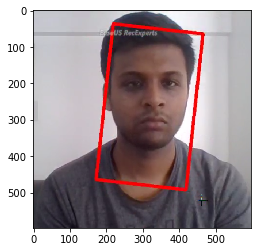

In [30]:
result = plt.imread('Output/cam.png')
plt.imshow(result)

# MeanShift

In [15]:
# Capture a video stream
cap = cv2.VideoCapture('Input/cam1.mp4')

# take first frame of the video
ret,frame = cap.read()


# Set Up the Initial Tracking Window


# We will first detect the face and set that as our starting box.
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

face_rects = face_cascade.detectMultiScale(frame)

while len(face_rects) == 0:
    face_rects = face_cascade.detectMultiScale(frame)

# Convert this list of a single array to a tuple of (x,y,w,h)
(face_x,face_y,w,h) = tuple(face_rects[0]) 
track_window = (face_x,face_y,w,h)
# set up the ROI for tracking
roi = frame[face_y:face_y+h, face_x:face_x+w]


# Use the HSV Color Mapping
hsv_roi =  cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

# Find histogram to backproject the target on each frame for calculation of meanshit
roi_hist = cv2.calcHist([hsv_roi],[0],None,[180],[0,180])

# Normalize the histogram array values given a min of 0 and max of 255
cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)


# Setup the termination criteria, either 10 iteration or move by at least 1 pt
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )

while True:
    ret ,frame = cap.read()
    if ret == True:
        
        # Grab the Frame in HSV
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        
        # Calculate the Back Projection based off the roi_hist created earlier
        dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)
        
        # Apply meanshift to get the new coordinates of the rectangle
        ret, track_window = cv2.meanShift(dst, track_window, term_crit)
        
        # Draw the new rectangle on the image
        x,y,w,h = track_window
        img2 = cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255),5)
        
        cv2.imshow('img2',img2)
        
        
        k = cv2.waitKey(1) & 0xff
        if k == 27:
            break
        
    else:
        break
        
cv2.destroyAllWindows()
cap.release()

## Resultant output frame of Meanshift

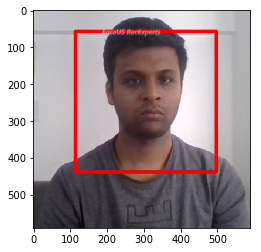

In [31]:
result = plt.imread('Output/mean.png')
plt.imshow(result)